In [1]:
%load_ext autoreload
%autoreload 2

Data taken from this study:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6379049/


In [2]:
kuster_evidence_file = "../../test_data/system_tests/kuster_tissue_data/evidence.txt.maxquant_evidence_benchmark.aq_reformat.tsv"
kuster_iqnormed_evidence_file = "../../test_data/system_tests/kuster_tissue_data/evidence.iqnormed.txt"
figure_name = "../../test_data/system_tests/kuster_tissue_data/normalization_plots.pdf"
experiment_to_tissue_map = "../../test_data/system_tests/kuster_tissue_data/experiment_to_tissue_map.tsv"

outfile = "../../test_data/system_tests/kuster_tissue_data/normalization_plots.pdf"

In [3]:
import pandas as pd
import numpy as np
import directlfq.benchmarking as lfq_benchmark

class NormalizationVisualization():
    def __init__(self, ion_dataframe, title, ax, cumulative = False, histtype = 'step', density = True, bins = 150):
        self._prepared_dataframe = DataframePreparerNormalizationPlot(ion_dataframe)
        self._ax = ax
        self._title = title
        self._histconfig = lfq_benchmark.HistPlotConfig(cumulative, histtype, density, bins)
        self._plot_shift_histogram()
    
    def _plot_shift_histogram(self):
        for column in self._prepared_dataframe.reference_normalized_dataframe.columns:
            fcs_to_reference = self._prepared_dataframe.reference_normalized_dataframe[column]
            self._ax.hist(fcs_to_reference, cumulative = self._histconfig.cumulative, histtype = self._histconfig.histtype, density = self._histconfig.density, bins = self._histconfig.bins, label = column)
        self._ax.set_xlabel("log2FC to reference sample")
        self._ax.set_title(self._title)
        self._ax.legend()


class PeptideTablePreparer():
    def __init__(self, tissue_map_file ):
        self._tissue_map_file = tissue_map_file
        self._tissue_map = {}

        self._define_tissue_map()

    def _define_tissue_map(self):
        tissue_df = pd.read_csv(self._tissue_map_file, sep = "\t")
        self._tissue_map = dict(zip(tissue_df["experiment"], tissue_df["tissue"]))

    def _remove_second_hypophysis(self, peptide_df : pd.DataFrame):
        peptide_df = peptide_df.drop(columns = ["P018020", "P013127"])#["P018020", "P010738"])
        
        return peptide_df

    def get_renamed_peptide_df(self, peptide_df : pd.DataFrame):
        peptide_df = self._remove_second_hypophysis(peptide_df)
        renamed_columns = [self._tissue_map.get(x, x) for x in peptide_df.columns]
        peptide_df.columns = renamed_columns
        return peptide_df

In [4]:
peptide_table_preparer = PeptideTablePreparer(experiment_to_tissue_map)

In [5]:
import directlfq.utils as lfq_utils

def load_unnormedpeptide_df(evidence_file):
    peptide_df = lfq_utils.import_data(kuster_evidence_file, input_type_to_use="maxquant_evidence_benchmark")
    peptide_df = lfq_utils.index_and_log_transform_input_df(peptide_df)
    peptide_df = lfq_utils.remove_allnan_rows_input_df(peptide_df)

    return peptide_df

peptide_df = load_unnormedpeptide_df(kuster_evidence_file)
display(peptide_df)
peptide_df = peptide_table_preparer.get_renamed_peptide_df(peptide_df)
display(peptide_df)

P010693  P010694  P010695  \
protein ion                                                            
0       _ILELEKQKEEAQR_4                       NaN      NaN      NaN   
1       _VDFSLSSDRDFILLNVPIPQEQAR_3            NaN      NaN      NaN   
        _VGETLNLNLRAVGISGSFSYFYYMIVSR_7        NaN      NaN      NaN   
        _VQQPACREPFLSCCQFAESLR_3               NaN      NaN      NaN   
10      _CLAWSSEQAK_2                          NaN      NaN      NaN   
...                                            ...      ...      ...   
9998    _TQPVREPSAPKLEGQMGEDGNSIK_4      24.805382      NaN      NaN   
        _TQPVREPSAPK_2                   24.073083      NaN      NaN   
9999    _ITTPYM(ox)TKYER_3                     NaN      NaN      NaN   
        _ITTPYMTK_2                            NaN      NaN      NaN   
99;98   _LTPETLTR_2                            NaN      NaN      NaN   

                                           P010738  P010739  P010740  P013127  \
protein ion                                                                     
0       _ILELEKQKEEAQR_4                       NaN      NaN      NaN      NaN   
1       _VDFSLSSDRDFILLNVPIPQEQAR_3            NaN      NaN      NaN      NaN   
        _VGETLNLNLRAVGISGSFSYFYYMIVSR_7  21.064803      NaN      NaN      NaN   
        _VQQPACREPFLSCCQFAESLR_3               NaN      NaN      NaN      NaN   
10      _CLAWSSEQAK_2                          NaN      NaN      NaN      NaN   
...                                            ...      ...      ...      ...   
9998    _TQPVREPSAPKLEGQMGEDGNSIK_4            NaN      NaN      NaN      NaN   
        _TQPVREPSAPK_2                         NaN      NaN      NaN      NaN   
9999    _ITTPYM(ox)TKYER_3                     NaN      NaN      NaN      NaN   
        _ITTPYMTK_2                            NaN      NaN      NaN      NaN   
99;98   _LTPETLTR_2                            NaN      NaN      NaN      NaN   

                                           P018020    P018021  
protein ion                                                    
0       _ILELEKQKEEAQR_4                 23.793425  22.755033  
1       _VDFSLSSDRDFILLNVPIPQEQAR_3      22.303378        NaN  
        _VGETLNLNLRAVGISGSFSYFYYMIVSR_7        NaN        NaN  
        _VQQPACREPFLSCCQFAESLR_3         26.381840        NaN  
10      _CLAWSSEQAK_2                    26.911022        NaN  
...                                            ...        ...  
9998    _TQPVREPSAPKLEGQMGEDGNSIK_4            NaN        NaN  
        _TQPVREPSAPK_2                         NaN        NaN  
9999    _ITTPYM(ox)TKYER_3               27.626309        NaN  
        _ITTPYMTK_2                            NaN  24.049264  
99;98   _LTPETLTR_2                      29.112249        NaN  

[286726 rows x 9 columns]

colon  tonsil  placenta  \
protein ion                                                            
0       _ILELEKQKEEAQR_4                       NaN     NaN       NaN   
1       _VDFSLSSDRDFILLNVPIPQEQAR_3            NaN     NaN       NaN   
        _VGETLNLNLRAVGISGSFSYFYYMIVSR_7        NaN     NaN       NaN   
        _VQQPACREPFLSCCQFAESLR_3               NaN     NaN       NaN   
10      _CLAWSSEQAK_2                          NaN     NaN       NaN   
...                                            ...     ...       ...   
9998    _TQPVREPSAPKLEGQMGEDGNSIK_4      24.805382     NaN       NaN   
        _TQPVREPSAPK_2                   24.073083     NaN       NaN   
9999    _ITTPYM(ox)TKYER_3                     NaN     NaN       NaN   
        _ITTPYMTK_2                            NaN     NaN       NaN   
99;98   _LTPETLTR_2                            NaN     NaN       NaN   

                                             liver  stomach  lung  pituitary  
protein ion                                                                   
0       _ILELEKQKEEAQR_4                       NaN      NaN   NaN  22.755033  
1       _VDFSLSSDRDFILLNVPIPQEQAR_3            NaN      NaN   NaN        NaN  
        _VGETLNLNLRAVGISGSFSYFYYMIVSR_7  21.064803      NaN   NaN        NaN  
        _VQQPACREPFLSCCQFAESLR_3               NaN      NaN   NaN        NaN  
10      _CLAWSSEQAK_2                          NaN      NaN   NaN        NaN  
...                                            ...      ...   ...        ...  
9998    _TQPVREPSAPKLEGQMGEDGNSIK_4            NaN      NaN   NaN        NaN  
        _TQPVREPSAPK_2                         NaN      NaN   NaN        NaN  
9999    _ITTPYM(ox)TKYER_3                     NaN      NaN   NaN        NaN  
        _ITTPYMTK_2                            NaN      NaN   NaN  24.049264  
99;98   _LTPETLTR_2                            NaN      NaN   NaN        NaN  

[286726 rows x 7 columns]

In [6]:
import directlfq.utils as lfq_utils

def load_iqnormed_peptide_df(iqnormed_evidence_file):
    iqnormed_peptide_df = lfq_utils.import_data(kuster_iqnormed_evidence_file, input_type_to_use="maxquant_evidence_benchmark_iqnormed")
    iqnormed_peptide_df = lfq_utils.index_and_log_transform_input_df(iqnormed_peptide_df)
    iqnormed_peptide_df = lfq_utils.remove_allnan_rows_input_df(iqnormed_peptide_df)
    return iqnormed_peptide_df

iqnormed_peptide_df = load_iqnormed_peptide_df(kuster_iqnormed_evidence_file)
iqnormed_peptide_df = peptide_table_preparer.get_renamed_peptide_df(iqnormed_peptide_df)

using input type maxquant_evidence_benchmark_iqnormed


In [7]:
import directlfq.normalization as lfq_norm

norm_mgr = lfq_norm.NormalizationManagerSamples(peptide_df.copy(), num_samples_quadratic=50)
display(norm_mgr.complete_dataframe)
display(norm_mgr.complete_dataframe.dropna())

colon  tonsil  placenta  \
protein ion                                                            
0       _ILELEKQKEEAQR_4                       NaN     NaN       NaN   
1       _VDFSLSSDRDFILLNVPIPQEQAR_3            NaN     NaN       NaN   
        _VGETLNLNLRAVGISGSFSYFYYMIVSR_7        NaN     NaN       NaN   
        _VQQPACREPFLSCCQFAESLR_3               NaN     NaN       NaN   
10      _CLAWSSEQAK_2                          NaN     NaN       NaN   
...                                            ...     ...       ...   
9998    _TQPVREPSAPKLEGQMGEDGNSIK_4      25.387413     NaN       NaN   
        _TQPVREPSAPK_2                   24.655114     NaN       NaN   
9999    _ITTPYM(ox)TKYER_3                     NaN     NaN       NaN   
        _ITTPYMTK_2                            NaN     NaN       NaN   
99;98   _LTPETLTR_2                            NaN     NaN       NaN   

                                             liver  stomach  lung  pituitary  
protein ion                                                                   
0       _ILELEKQKEEAQR_4                       NaN      NaN   NaN  23.147645  
1       _VDFSLSSDRDFILLNVPIPQEQAR_3            NaN      NaN   NaN        NaN  
        _VGETLNLNLRAVGISGSFSYFYYMIVSR_7  20.713261      NaN   NaN        NaN  
        _VQQPACREPFLSCCQFAESLR_3               NaN      NaN   NaN        NaN  
10      _CLAWSSEQAK_2                          NaN      NaN   NaN        NaN  
...                                            ...      ...   ...        ...  
9998    _TQPVREPSAPKLEGQMGEDGNSIK_4            NaN      NaN   NaN        NaN  
        _TQPVREPSAPK_2                         NaN      NaN   NaN        NaN  
9999    _ITTPYM(ox)TKYER_3                     NaN      NaN   NaN        NaN  
        _ITTPYMTK_2                            NaN      NaN   NaN  24.441876  
99;98   _LTPETLTR_2                            NaN      NaN   NaN        NaN  

[286726 rows x 7 columns]

colon     tonsil   placenta  \
protein ion                                                               
100     _MLQEDELR_2                     24.175919  24.637799  24.058206   
        _VQESADELQK_2                   25.926214  25.434898  23.060899   
10011   _ELQVLSEQYSQK_2                 26.249203  24.773350  25.389650   
        _LQGEAPQSALR_2                  26.135921  25.020901  23.818041   
        _VKENELQYLKK_3                  25.071420  23.450139  24.263749   
...                                           ...        ...        ...   
997     _YRSDGALLLGASSLSGR_3            22.577516  24.554880  24.448084   
9996    _EGVIGVTEEQVHHIVK_3             26.797015  25.327605  27.240050   
        _QGAPGQGGGGGLSHEDTLALLEGLVSR_3  25.466352  25.770836  22.985487   
        _RLEDQLAGLQQELAALALK_3          22.231643  25.929422  23.774173   
        _SSLEELHGDANWGEDLR_3            24.234972  26.339630  22.797836   

                                            liver    stomach       lung  \
protein ion                                                               
100     _MLQEDELR_2                     24.869332  24.756845  25.235110   
        _VQESADELQK_2                   25.061444  26.734136  26.624943   
10011   _ELQVLSEQYSQK_2                 26.482100  25.616588  25.506022   
        _LQGEAPQSALR_2                  25.855192  26.438213  26.439345   
        _VKENELQYLKK_3                  24.726783  26.135435  25.523516   
...                                           ...        ...        ...   
997     _YRSDGALLLGASSLSGR_3            25.892710  25.836125  23.476892   
9996    _EGVIGVTEEQVHHIVK_3             24.073033  26.817765  27.838425   
        _QGAPGQGGGGGLSHEDTLALLEGLVSR_3  23.765417  25.207190  26.034681   
        _RLEDQLAGLQQELAALALK_3          22.333723  24.268573  24.368780   
        _SSLEELHGDANWGEDLR_3            22.298596  22.713117  24.168484   

                                        pituitary  
protein ion                                        
100     _MLQEDELR_2                     23.130959  
        _VQESADELQK_2                   24.983535  
10011   _ELQVLSEQYSQK_2                 25.729867  
        _LQGEAPQSALR_2                  24.829246  
        _VKENELQYLKK_3                  24.963934  
...                                           ...  
997     _YRSDGALLLGASSLSGR_3            22.800018  
9996    _EGVIGVTEEQVHHIVK_3             26.204842  
        _QGAPGQGGGGGLSHEDTLALLEGLVSR_3  23.976323  
        _RLEDQLAGLQQELAALALK_3          22.711364  
        _SSLEELHGDANWGEDLR_3            22.399577  

[9422 rows x 7 columns]

colon  tonsil  placenta  \
protein ion                                                            
0       _ILELEKQKEEAQR_4                       NaN     NaN       NaN   
1       _VDFSLSSDRDFILLNVPIPQEQAR_3            NaN     NaN       NaN   
        _VGETLNLNLRAVGISGSFSYFYYMIVSR_7        NaN     NaN       NaN   
        _VQQPACREPFLSCCQFAESLR_3               NaN     NaN       NaN   
10      _CLAWSSEQAK_2                          NaN     NaN       NaN   
...                                            ...     ...       ...   
9998    _TQPVREPSAPKLEGQMGEDGNSIK_4      24.805382     NaN       NaN   
        _TQPVREPSAPK_2                   24.073083     NaN       NaN   
9999    _ITTPYM(ox)TKYER_3                     NaN     NaN       NaN   
        _ITTPYMTK_2                            NaN     NaN       NaN   
99;98   _LTPETLTR_2                            NaN     NaN       NaN   

                                             liver  stomach  lung  pituitary  
protein ion                                                                   
0       _ILELEKQKEEAQR_4                       NaN      NaN   NaN  22.755033  
1       _VDFSLSSDRDFILLNVPIPQEQAR_3            NaN      NaN   NaN        NaN  
        _VGETLNLNLRAVGISGSFSYFYYMIVSR_7  21.064803      NaN   NaN        NaN  
        _VQQPACREPFLSCCQFAESLR_3               NaN      NaN   NaN        NaN  
10      _CLAWSSEQAK_2                          NaN      NaN   NaN        NaN  
...                                            ...      ...   ...        ...  
9998    _TQPVREPSAPKLEGQMGEDGNSIK_4            NaN      NaN   NaN        NaN  
        _TQPVREPSAPK_2                         NaN      NaN   NaN        NaN  
9999    _ITTPYM(ox)TKYER_3                     NaN      NaN   NaN        NaN  
        _ITTPYMTK_2                            NaN      NaN   NaN  24.049264  
99;98   _LTPETLTR_2                            NaN      NaN   NaN        NaN  

[286726 rows x 7 columns]

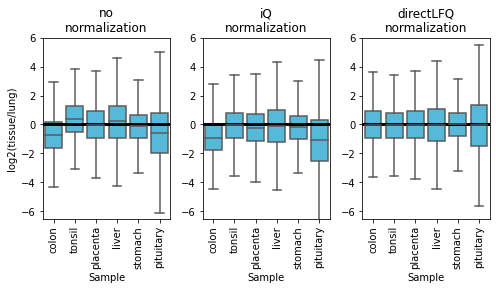

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import directlfq.visualizations as lfq_viz
import pandas as pd

class NormalizationBoxPlotter():
    def __init__(self, peptide_dataframes:list, names_of_peptide_dataframes:list, axes):
        self._peptide_dataframes = peptide_dataframes
        self._names_of_peptide_dataframes = names_of_peptide_dataframes
        self._box_color = lfq_viz.AlphaPeptColorMap().colorlist_hex[0]
        self._axes = axes
        self._xlabels = None

        self._define_xlabels()
        self._plot_boxplots()


    def _define_xlabels(self):
        self._xlabels = self._peptide_dataframes[0].columns

    def _plot_boxplots(self):
        for idx in range(len(self._peptide_dataframes)):
            PeptideDfNormBoxPlotter(peptide_df = self._peptide_dataframes[idx], name = self._names_of_peptide_dataframes[idx], ax = self._axes[idx], box_color = self._box_color, ordered_labels= self._xlabels).plot_boxplot()

    

class PeptideDfNormBoxPlotter():
    def __init__(self, peptide_df, name, ax, box_color, ordered_labels = None):
        self._name = name
        self._ax = ax
        self._box_color = box_color
        self._peptide_df = peptide_df
        self._reference_column = "lung"
        
        self._ordered_labels = ordered_labels
        self._dataframe_reference_preparer :DataframePreparerNormalizationPlot = None
        self._melted_prepared_reference_normed_df = None
        self._define_dataframe_reference_preparer()
        self._remove_reference_from_ordered_labels()
        self._define_melted_prepared_reference_normed_df()

    def _define_dataframe_reference_preparer(self):
        self._dataframe_reference_preparer = DataframePreparerNormalizationPlot(self._peptide_df, self._reference_column)
    
    def _remove_reference_from_ordered_labels(self):
        self._ordered_labels = [x for x in self._ordered_labels if x != self._dataframe_reference_preparer.reference_column]

    def _define_melted_prepared_reference_normed_df(self):
        self._melted_prepared_reference_normed_df = self._dataframe_reference_preparer.reference_normalized_dataframe.dropna()
        self._melted_prepared_reference_normed_df = self._melted_prepared_reference_normed_df.reset_index().melt(var_name="Sample", value_name="log2FC to reference",id_vars=['protein', 'ion'])

    def plot_boxplot(self):

        sns.boxplot(x="Sample", y="log2FC to reference", data=self._melted_prepared_reference_normed_df, ax=self._ax, color=self._box_color, showfliers=False, order = self._ordered_labels)
        self._ax.set_xticklabels(self._ordered_labels, rotation=90)
        self._ax.set_ylim(-6.5, 6)
        self._ax.set_ylabel(f"log2(tissue/{self._reference_column})")
        self._ax.axhline(y=0, color='black', linestyle='-', linewidth=3)
        self._ax.set_title(self._name)

class DataframePreparerNormalizationPlot():
    def __init__(self, ion_dataframe, reference_column ):
        self._ion_dataframe = ion_dataframe
        self.reference_column = reference_column
        self.reference_normalized_dataframe = None
        self._define_reference_normalized_dataframe()

    def _define_reference_normalized_dataframe(self):
        self._subtract_reference_from_ion_dataframe()

    
    def _get_num_valid_values(self, column_name):
        values = self._ion_dataframe[column_name].to_numpy()
        print(sum(~np.isnan(values)))
        return sum(~np.isnan(values))

    def _subtract_reference_from_ion_dataframe(self):
        self.reference_normalized_dataframe = self._ion_dataframe.subtract(self._ion_dataframe[self.reference_column], axis = 0)
        self.reference_normalized_dataframe = self.reference_normalized_dataframe.drop(labels = self.reference_column, axis = 1)




dfs = [peptide_df.copy(), iqnormed_peptide_df.copy(), norm_mgr.complete_dataframe.copy()]
display(dfs[0])
names = ["no\nnormalization", "iQ\nnormalization", "directLFQ\nnormalization"]

a4_dims = (11.7, 8.27)
a4_width_no_margin = 10.5
fig, axes = plt.subplots(1, 3,figsize=(a4_width_no_margin/1.5,2.363*1.75 ))

normboxplotter = NormalizationBoxPlotter(peptide_dataframes=dfs, names_of_peptide_dataframes=names, axes=axes)
for ax in axes[1:]:
    ax.set_ylabel("")

fig.tight_layout()
fig.savefig(outfile, dpi=300, bbox_inches='tight')
fig.savefig(outfile.replace(".pdf", ".png"), dpi=300, bbox_inches='tight')



lung
lung
lung


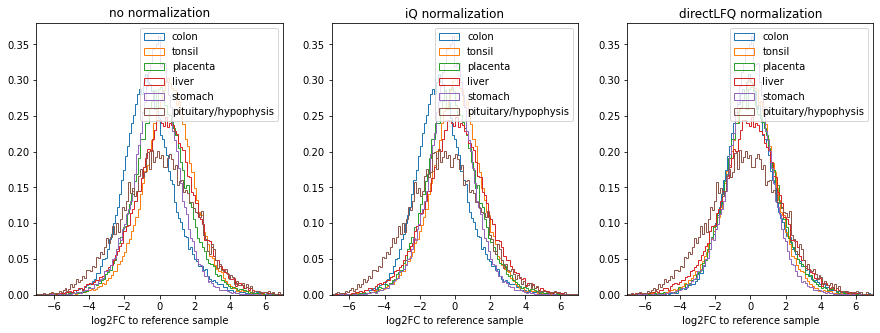

In [52]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(nrows=1, ncols=3, figsize = (15, 5))

normviz = NormalizationVisualization(peptide_df, title="no normalization",ax=axes[0])

NormalizationVisualization(iqnormed_peptide_df, title= "iQ normalization",ax=axes[1])

NormalizationVisualization(norm_mgr.complete_dataframe, "directLFQ normalization",ax=axes[2])



axes[0].set_xlim(-7, 7)
axes[1].set_xlim(-7, 7)
axes[2].set_xlim(-7, 7)



fig.savefig(figure_name)

### Learning Tests

In [33]:
import seaborn as sns

def test_subtracting_from_df():
    iris = sns.load_dataset('iris')
    display(iris)
    iris = iris.set_index("species")

    iris2 = iris.subtract(iris["petal_width"], axis=0)
    display(iris2)
    assert np.allclose([0], iris2["petal_width"])

test_subtracting_from_df()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.9,3.3,1.2,0.0
setosa,4.7,2.8,1.2,0.0
setosa,4.5,3.0,1.1,0.0
setosa,4.4,2.9,1.3,0.0
setosa,4.8,3.4,1.2,0.0
...,...,...,...,...
virginica,4.4,0.7,2.9,0.0
virginica,4.4,0.6,3.1,0.0
virginica,4.5,1.0,3.2,0.0
